Đồ án cuối kỳ
Thành viên:
Họ tên: Trần Phúc Nguyên
MSSV: 18120488
Họ tên: Trần Thành Long
MSSV: 18120455

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


---

## Thu thập dữ liệu

Trong bài này, ta sẽ dùng dữ liệu đã được thu thập sẵn là file "vgsales.csv" đính kèm; đây là dữ liệu về danh sách các video game đã bán hơn 100,000 bản("vgsales" là viết tắt của "video games sales"). Dữ liệu này được lấy từ trang Kaggle link trang:(https://www.kaggle.com/gregorut/videogamesales). \
Lần cuối dữ liệu được update là 26/10/2016.
Dữ liệu được thu thập bằng cách sử dụng BeautifulSoup của Python(link script: https://github.com/GregorUT/vgchartzScrape.) để cào dữ liệu từ website vgchartz.com.
Dữ liệu không có License.

---

## Khám phá dữ liệu

### Đọc dữ liệu từ file csv vào dataframe

In [2]:
vgsales_df = pd.read_csv('vgsales.csv')
vgsales_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

In [3]:
num_rows, num_cols = vgsales_df.shape
num_rows, num_cols

(16598, 11)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Theo mô tả dữ liệu của nguồn từ trang Kaggle và theo quan sát sơ bộ về dữ liệu thì một dòng cho biết thông tin về sales của một tựa game nào đó. Có vẻ không có dòng nào bị "lạc loài".

### Dữ liệu có các dòng bị lặp không?

In [4]:
vgsales_df.duplicated().any()

False

### Mỗi cột có ý nghĩa gì?

Dưới đây là phần mô tả của nguồn từ trang Kaggle về các cột trong file "vgsales.csv"

- **Rank:** Ranking of overall sales

- **Name:** The games name

- **Platform:** Platform of the games release (i.e. PC,PS4, etc.)

- **Year:** Year of the game's release

- **Genre:** Genre of the game

- **Publisher:** Publisher of the game

- **NA_Sales:** Sales in North America (in millions)

- **EU_Sales:** Sales in Europe (in millions)

- **JP_Sales:** Sales in Japan (in millions)

- **Other_Sales:** Sales in the rest of the world (in millions)

- **Global_Sales:** Total worldwide sales.

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không? 

In [5]:
vgsales_df.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

`vgsales_df` có 4 cột có `dtype` là `object`: "Name", "Platform", "Genre", "Publisher". Trong HW3, chúng ta đã hiểu về ý nghĩa của `object` trong Pandas. Chúng ta cũng sẽ viết một hàm nhận đầu vào là một cột `s` (series) có `dtype` là `object` và trả về tập các kiểu dữ liệu thật sự có trong cột này.

In [6]:
def open_object_dtype(s):
    dtypes = set()
    s.apply(lambda x: dtypes.add(type(x)))
    return dtypes

In [7]:
print(open_object_dtype(vgsales_df['Name']))
print(open_object_dtype(vgsales_df['Platform']))
print(open_object_dtype(vgsales_df['Genre']))
print(open_object_dtype(vgsales_df['Publisher']))

{<class 'str'>}
{<class 'str'>}
{<class 'str'>}
{<class 'str'>, <class 'float'>}


Chúng ta sẽ kiểm tra xem tại sao lại có các gìá trị `float` ở cột `Year` và cột `Publisher`. Dự đoán có thể là do sự tồn tại của các giá trị NaN ở các cột này. Chúng ta sẽ kiểm tra thử số lượng các giá trị NaN của các cột.

In [8]:
vgsales_df.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Như vậy dự đoán của chúng ta là chính xác, sự xuất hiện của các giá trị NaN ở cột `Year` và `Publisher` có thể là do các tựa game này là một các tựa game nhỏ được phát triển bởi vài cá nhân, nên chúng ta không có thông tin chi tiết về.

**Vấn đề cần tiền xử lý:**
- Cột `Year` không nhất thiết phải chuyển về `int`, nên chúng ta sẽ tạm sử dụng dtype `float` vì có sự xuất hiện của các giá trị NaN.
- Cột "Publisher" có dtype gồm 2 loại là `str` và `float`. Nếu kiểm tra thêm thì chúng ta sẽ thấy `float` là ứng với `NaN`, còn `str` là ứng với tên của nhà phát hành.  Để có thể tiếp tục khám phá thêm về cột này, ta cũng sẽ thực hiện bước tiền xử lý là chuyển tất cả sang dtype là `str`. Những cột có giá trị NaN sẽ được để khoảng trống.

---

## Tiền xử lý

### Chuyển dtype của cột `Publisher` về str:

Chúng ta sẽ fill các giá trị NaN bằng `''`, sau đó sử dụng `astype` để đưa type thực sự về `str`.

In [9]:
vgsales_df['Publisher'] = vgsales_df['Publisher'].fillna('').astype('str')
open_object_dtype(vgsales_df['Publisher'])

{str}

---

## Khám phá dữ liệu (tiếp tục)

### Với mỗi cột có kiểu dữ liệu dạng numeric, các giá trị được phân bố như thế nào?

#### Định nghĩa hàm *`missing_ratio`*:

In [10]:
def missing_ratio(s):
    return s.isna().mean() * 100

Hiện có 7 cột có vẻ là thuộc nhóm numeric: `Rank`, `Year`, `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`. Tuy nhiên, cột `Rank` có vẻ thuộc nhóm categorical. Như vậy, chỉ có 5 cột numeric là `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`. 

Với mỗi cột numeric chúng ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Dataframe kết quả có 3 dòng là "missing_ratio", "min", "max"; và có 7 cột là `Year`, `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other_Sales`, `Global_Sales`.

In [11]:
nume_col_profiles_df = vgsales_df[["Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]].agg(\
    [missing_ratio, 'min', 'max'])
nume_col_profiles_df

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
missing_ratio,1.632727,0.00,0.00,0.00,0.00,0.00
min,1980.000000,0.00,0.00,0.00,0.00,0.01
max,2020.000000,41.49,29.02,10.22,10.57,82.74


Như đã phân tích, các dòng của cột `Year` sẽ có giá trị thiếu, các cột còn lại đều không có giá trị thiếu. Min và max của các cột có vẻ không có gì bất thường.

### Với mỗi cột có kiểu dữ liệu dạng categorical, các giá trị được phân bố như thế nào?

`vgsales_df` có 6 cột categorical là `Rank`, `Name`, `Platform`, `Genre`, `Publisher`.

Với mỗi cột categorical, chúng ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), số lượng giá trị khác nhau, list/array một vài các giá trị khác nhau. Dataframe kết quả có 3 dòng là "missing_ratio", "num_diff_vals", "some_diff_vals"; và có 5 cột là `Rank`, `Name`, `Platform`, `Genre`, `Publisher`.

In [12]:
# YOUR CODE HERE
cate_col_profiles_df = vgsales_df[['Rank', 'Name', 'Platform', 'Genre', 'Publisher']].agg(\
    [missing_ratio, 'nunique', 'unique'])
cate_col_profiles_df = cate_col_profiles_df.rename(index={'nunique':'num_diff_vals', 'unique':'some_diff_vals'})
cate_col_profiles_df

,Rank,Name,Platform,Genre,Publisher
missing_ratio,0,0,0,0,0
num_diff_vals,16598,11493,31,12,579
some_diff_vals,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[Wii Sports, Super Mario Bros., Mario Kart Wii...","[Wii, NES, GB, DS, X360, PS3, PS2, SNES, GBA, ...","[Sports, Platform, Racing, Role-Playing, Puzzl...","[Nintendo, Microsoft Game Studios, Take-Two In..."


---

## Đưa ra các câu hỏi cần trả lời

Sau khi đã khám phá dữ liệu và hiểu hơn về dữ liệu, ta thấy có một số câu hỏi có thể được trả lời bằng dữ liệu:
1. Số lượng các game được bán ra thay đổi như thế nào theo năm? 
    - *Ý nghĩa: Cung cấp một cái nhìn trực quan mức độ tăng trưởng của thị trường ngành công nghiệp phát triển video game qua từng năm.*
2. Top 3 thể loại game được mua nhiều nhất ở từng khu vực theo từng năm?
    - *Ý nghĩa: Biết được thể loại game yêu thích của từng khu vực cũng như toàn thế giới. Qua đó có thể có các chiến lược marketing đúng đắn cho từng khu vực.*
3. Nhà phát triển dẫn đầu về doanh số bán ra theo từng khu vực trên thế giới trong 10 năm gần đây. Nguyên nhân nào giúp cho những nhà phát triển này hiện đang dẫn đầu?
    - *Ý nghĩa: Tìm ra nhà phát triển game được quan tâm nhiều nhất theo từng khu vực, từ đây ta có thể tiếp tục phân tích về cách các nhà phát triển này tạo ra những game như thế nào để giúp cho họ hiện đang dẫn đầu.*
4. Trong 5 năm gần đây,5 loại nền tảng nào có nhiều số lượng game bán chạy nhất trên từng khu vực và toàn thế giới?
    - *Ý nghĩa: Từ đây, các nhà phát triển game sẽ biết được game của họ phát triển trên nền tảng nào sẽ thu hút được nhiều lượt mua của người dùng.*

---

## Phân tích dữ liệu để trả lời câu hỏi

### Nhà phát triển dẫn đầu về doanh số bán ra theo từng khu vực trên thế giới trong 10 năm gần đây. Nguyên nhân nào giúp cho những nhà phát triển này hiện đang dẫn đầu?

Để trả lời được câu hỏi cần hai bước sau:
- **Bước 1**: Tìm ra nhà phát triển game dẫn đầu doanh số bán ra trong 10 năm gần đây trên từng khu vực và toàn thế giới.
- **Bước 2**: Dựa trên thông tin nhà phát triển nào dẫn đầu doanh số, để biết được nguyên nhân thành công ta sẽ xét xem thể loại game nào có mức bán ra cao nhất của hảng đó. 

#### Bước 1: Tìm nhà phát triển game đang dẫn đầu trên thế giới và từng khu vực:

*Lưu ý: Từng khu vực ở đây là chúng ta chỉ xét các khu vực cụ thể như NA,JP,EU chứ không xét đến các khu vực khác "Other"*

#### Trên thế giới(World)

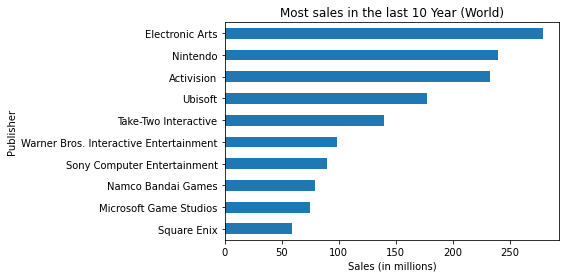

In [45]:
df=vgsales_df
pGlobal=df[df["Year"]>2009].groupby('Publisher')
pGlobal=pGlobal.Global_Sales.sum()
pGlobal=pGlobal.sort_values().tail(10)
pGlobal.plot.barh(title='Most sales in the last 10 Year (World)');
plt.xlabel('Sales (in millions)');

Như vậy dễ dàng thấy **Electronic Arts** là nhà phát triển dẫn đầu về doanh số bán ra trên thế giới trong 10 năm gần đây

#### Tại khu vực Bắc Mỹ(NA)

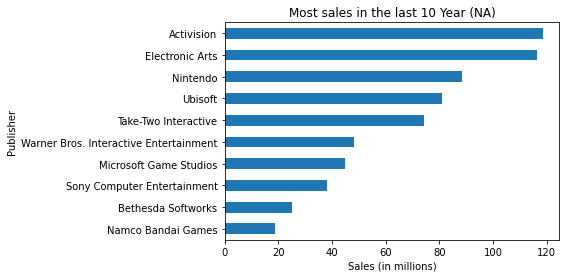

In [46]:
df=vgsales_df
pNA=df[df["Year"]>2009].groupby('Publisher')
pNA=pNA.NA_Sales.sum()
pNA=pNA.sort_values().tail(10)
pNA.plot.barh(title='Most sales in the last 10 Year (NA)');
plt.xlabel('Sales (in millions)');

Tại khu vực Bắc mỹ thì do **Activision** là nhà phát triển dẫn đầu về doanh số bán ra cách biệt không quá xa Electronic Art.

#### Tại khu vực Châu Âu(EU)

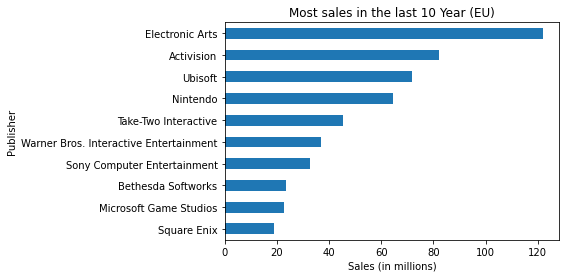

In [47]:
df=vgsales_df
pEU=df[df["Year"]>2009].groupby('Publisher')
pEU=pEU.EU_Sales.sum()
pEU=pEU.sort_values().tail(10)
pEU.plot.barh(title='Most sales in the last 10 Year (EU)');
plt.xlabel('Sales (in millions)');

Tại khu vực Châu Âu vẫn do **Electronic Art** là nhà phát triển dẫn đầu về doanh số bán ra.

#### Tại khu vực Nhật Bản(JP)

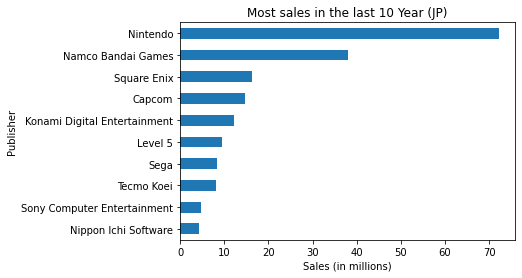

In [49]:
df=vgsales_df
pJP=df[df["Year"]>2009].groupby('Publisher')
pJP=pJP.JP_Sales.sum()
pJP=pJP.sort_values().tail(10)
pJP.plot.barh(title='Most sales in the last 10 Year (JP)');
plt.xlabel('Sales (in millions)');

Tại khu vực Nhật Bản thì là sự áp đảo của **Nintendo** về doanh số bán ra.Khá bất ngờ là Electronic Art dẫn đầu trên thế giới và nhiều khu vực nhưng lại không có mặt trong top 10 tại khu vực Nhật Bản

#### Bước 2: Nguyên nhân dẫn đầu về doanh số bán ra của các nhà phát triển game trên

#### Lý do dẫn đến sự dẫn đầu của **Electronic Art** tại khu vực Châu Âu, trên Thế giới và suýt dẫn đầu tại Bắc Mỹ.

*Thế giới*

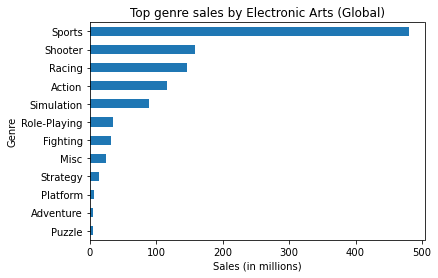

In [53]:
EA=vgsales_df[vgsales_df["Publisher"]=="Electronic Arts"].groupby("Genre").Global_Sales.sum()
EA.sort_values().plot.barh(title='Top genre sales by Electronic Arts (Global)');
plt.xlabel('Sales (in millions)');

*Châu Âu*

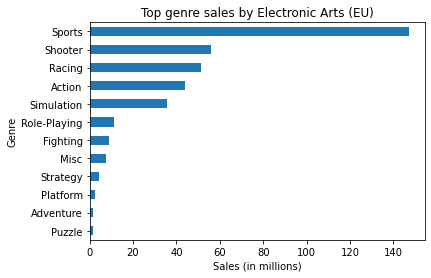

In [54]:
EA=vgsales_df[vgsales_df["Publisher"]=="Electronic Arts"].groupby("Genre").EU_Sales.sum()
EA.sort_values().plot.barh(title='Top genre sales by Electronic Arts (EU)');
plt.xlabel('Sales (in millions)');

**Nhận xét:** Có vẻ như nguyên nhân thành công chủ yếu giúp **EA(Electronic Arts)** dẫn đầu doanh thu đến từ những trò chơi thể thao(**Sports**) của họ.

#### Nguyên nhân giúp cho **Activision** vượt mặt EA tại Bắc Mỹ(NA).

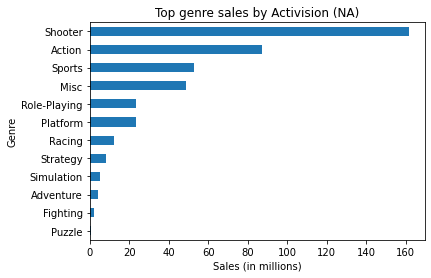

In [57]:
AC=vgsales_df[vgsales_df["Publisher"]=="Activision"].groupby("Genre").NA_Sales.sum()
AC.sort_values().plot.barh(title='Top genre sales by Activision (NA)');
plt.xlabel('Sales (in millions)');

**Nhận xét:** Có vẻ như thị hiếu ở thị trường NA đó là những tựa game bắn súng(**Shooter**) bằng chứng là thể loại này đã áp đảo về doanh số bán ra và giúp **Activision** dẫn đầu thị trường Bắc Mỹ

#### Tại sao Nintendo không có đối thủ tại thị trường Nhật Bản(JP).

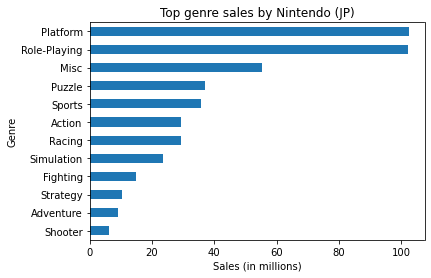

In [58]:
N=vgsales_df[vgsales_df["Publisher"]=="Nintendo"].groupby("Genre").JP_Sales.sum()
N.sort_values().plot.barh(title='Top genre sales by Nintendo (JP)');
plt.xlabel('Sales (in millions)');

**Nhận xét:** Từ biểu đồ trên dễ thấy hai thể loại game giúp **Nintendo** "thống trị" ở thị trường Nhật Bản(JP) đó là **Platform** và **Role-Playing**.

###  Trong 5 năm gần đây,5 loại nền tảng nào có nhiều số lượng game bán chạy nhất trên từng khu vực và toàn thế giới?

Loại platform ở đây được lưu trong cột "Platform".Từng khu vực ở đây là chúng ta chỉ xét các khu vực cụ thể như NA,JP,EU chứ không xét đến các khu vực khác "Other".Kết quả được lưu vào dataframe `top5_Platform` gồm 5 dòng ứng với thứ tự xếp hạng của các platform có nhiều game bán chạy nhất, 4 cột ứng với từng khu vực "Global","NA","EU","JP".

In [92]:
def find_top5_plf(t):
    t=t["Platform"].value_counts()
    top5=[t.index[0],t.index[1],t.index[2],t.index[3],t.index[4]]
    return top5

In [95]:
df=vgsales_df[vgsales_df["Year"]>2014]
top5_Global=find_top5_plf(df)
top5_NA=find_top5_plf(df[(df["Year"]>2009) & (df["NA_Sales"]>0)])
top5_EU=find_top5_plf(df[(df["Year"]>2009) & (df["EU_Sales"]>0)])
top5_JP=find_top5_plf(df[(df["Year"]>2009) & (df["JP_Sales"]>0)])
top5_Platform = pd.DataFrame(list(zip(top5_Global, top5_NA,top5_EU,top5_JP)),index=[1,2,3,4,5],columns =['Global', 'NA','EU','JP'])


,Global,NA,EU,JP
1,PS4,PS4,PS4,PSV
2,PSV,XOne,XOne,PS4
3,XOne,3DS,PC,3DS
4,3DS,PS3,PS3,PS3
5,PS3,X360,X360,WiiU


**Nhận xét**: Có thể thấy xu thế nền tảng chơi game trong 5 năm gần đây là "PS4","XOne" vì đây là 2 nền tảng có mặt hầu hết ở từng khu vực và đặt biệt là nền tảng "**PS4**" dẫn đầu về số lượng game bán chạy ở hầu hết các khu vực.